# Minimum, Maxium, and Mixture {#sec-3m}

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import binom 

## Cumulative Distriburtion Function (CDF)

我们先来看一下 Cumulative Distriburtion Function (CDF)，用我们在 @sec-choose-prior-dist 中的例子。

In [12]:
#| code-fold: true
def normalize_array(arr):
    return np.array([i/sum(arr) for i in arr])

def update_binom(heads, tosses, prior):
    """
    heads: number of heads 
    tosses: total tosses 
    prior: prior distribution; should be a empiricaldist.pmf object (a Series)
    """
    # 0/n, 1/n, 2/n ...
    likelihood_head = np.array([i/(n-1) for i in range(n)])
    coin_head_probabilities = likelihood_head
    likelihood = binom.pmf(k = heads, n = tosses, p = coin_head_probabilities)
    posterior = prior.copy()
    posterior *= likelihood 
    return normalize_array(posterior)

# n: number of coins
n = 1001
x_axis = range(n)
tosses = 250
# number of heads out of 250 tosses
heads = 140
prior = np.array([1]*n)
uniform = normalize_array(prior)
posterior = update_binom(heads, tosses, uniform)

In [13]:
def get_cdf(arr):
    """Get cumulative distribution function
    """
    total_sum = np.sum(arr)
    res = []
    sum = 0
    for x in arr:
        sum += x
        # normaize to make sure the max in res is 1
        res.append(sum/total_sum)
    return res 

In [14]:
cdf = get_cdf(posterior)

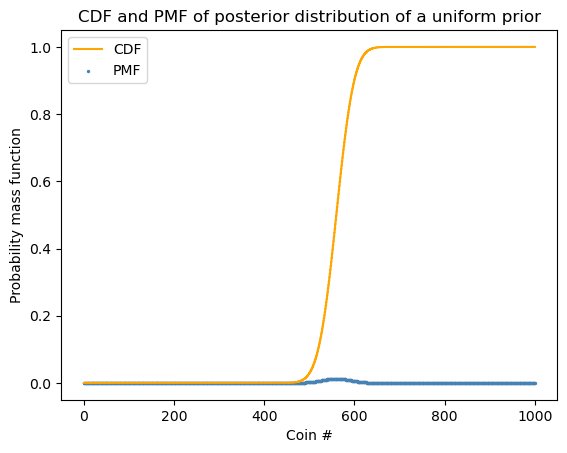

In [15]:
#| code-fold: true
plt.step(x=x_axis, y=cdf, label="CDF", color='orange', where='post')
# plt.scatter(x=x_axis, y = cdf, label="CDF", color = 'orange', s = 2)
plt.scatter(x = x_axis, y = posterior, 
            label="PMF", color="steelblue", s = 2)
plt.xlabel("Coin #")
plt.ylabel("Probability mass function")
plt.title("CDF and PMF of posterior distribution of a uniform prior")
plt.legend()
plt.show()

## Mixture Distribution

假设袋子里有两种硬币 A 和 B。A 的数量占 60%。 硬币 A 的属性是，随机抛一下，正面朝上和背面朝上的概率都是 50%。硬币 B 的属性是，随机抛一下，正面朝上的概率是 70%，背面朝上的概率是 30%。

现在问你，随机抽一枚硬币，随机抛一下，正面朝上的概率是多少？应该很容易算。


In [16]:
heads_prob = np.array([0.5, 0.7])
weights = np.array([0.6, 0.4])
res = (heads_prob * weights).sum()
res

0.58

所以正面朝上的概率是 58%。